# Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [2]:
# Creating a path to project folder.

path =  r'C:\Users\TanaT\(CF) Achievement 4 - Instacart Basket Analysis'

In [3]:
# Importing exported data from exercise 4.8.

df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'grouped_agg_orders_products_merged.pkl'))

In [4]:
# Checking dataframe.

df_ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,ordering_behavior_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regular busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regular busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regular busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


In [5]:
# Checking shape. 

df_ords_prods_merge.shape

(32404859, 24)

# Checking Missing Values in Ordering Behavior Flag and Related Columns

In [7]:
# Checking flag column.

df_ords_prods_merge['ordering_behavior_flag'].value_counts(dropna = False)

ordering_behavior_flag
Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: count, dtype: int64

In [9]:
# Looking at the 5 missing values in the flag column.

df_nan = df_ords_prods_merge[df_ords_prods_merge['ordering_behavior_flag'].isnull() == True]

In [10]:
df_nan

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,ordering_behavior_flag
6234909,10749,Organic Red Bell Pepper,83,4,5.7,895835,159838,1,0,17,...,Mid-range product,Busiest day,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN
12947653,21334,Organic Peeled Garlic,123,4,10.2,895835,159838,1,0,17,...,Mid-range product,Busiest day,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN
13839012,22198,4X Ultra Concentrated Natural Laundry Detergen...,75,17,1.7,895835,159838,1,0,17,...,Low-range product,Busiest day,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN
14758536,23695,California Veggie Burger,42,1,4.7,895835,159838,1,0,17,...,Low-range product,Busiest day,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN
21673807,33401,Goat Cheese Crumbles,21,16,14.8,895835,159838,1,0,17,...,Mid-range product,Busiest day,Busiest days,Average orders,1,New customer,7.42,Low spender,NaN,NaN


In [13]:
# Checking only the realted columns as to why there are missing values.

df_nan[['user_id','order_number', 'max_order', 'loyalty_flag', 'days_since_prior_order', 'median_days_between_orders','ordering_behavior_flag']]

,user_id,order_number,max_order,loyalty_flag,days_since_prior_order,median_days_between_orders,ordering_behavior_flag
6234909,159838,1,1,New customer,NaN,NaN,NaN
12947653,159838,1,1,New customer,NaN,NaN,NaN
13839012,159838,1,1,New customer,NaN,NaN,NaN
14758536,159838,1,1,New customer,NaN,NaN,NaN
21673807,159838,1,1,New customer,NaN,NaN,NaN


- All of the 5 missing values are from user_id 159838.
- They are a 'New customer' and have only placed 1 order.
- So the 'days_since_prior_order' is NaN, making the derived columns 'median_days_between_orders' and 'ordering_behavior_flag' columns have missing values.

# Cleaning Prices Column 

## Checking the distribution of prices. 

<Axes: ylabel='Frequency'>

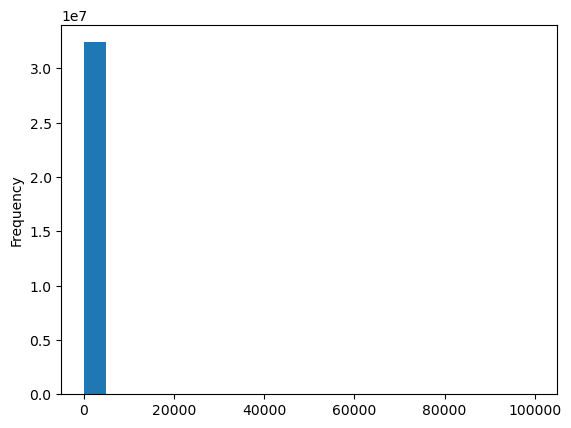

In [14]:
# Histograms are used to show the density of a continuous variable - the distribution of observations per their occurence in a data set. 
# Creating a histogram for the 'prices' column.
# Specifying the bin size also. 

df_ords_prods_merge['prices'].plot.hist(bins = 20)

In [15]:
# Guessing, the histogram is off due to unaddressed issues in 'prices' column.
# Checking the column.

df_ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [16]:
df_ords_prods_merge['prices'].mean()

np.float64(11.980225638383468)

In [17]:
df_ords_prods_merge['prices'].median()

7.4

In [18]:
df_ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

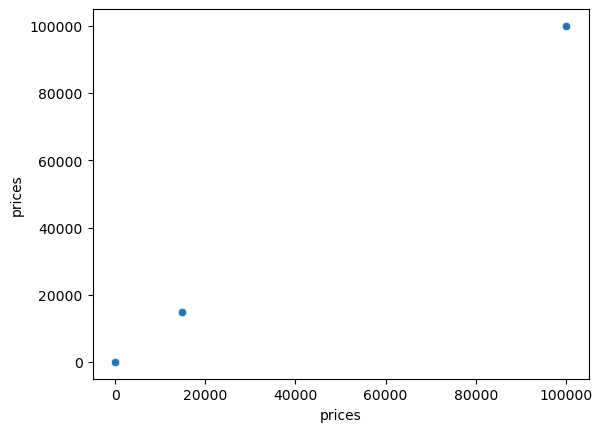

In [21]:
# Further exploring the spread of prices with a scatterplot.

sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_merge)

Scatterplot shows there is another outlier/outliers around 20,000.

In [23]:
# Creating a threshold. Anything priced above 100 dollars will be considered an outlier.
# Most products are around 7-12 dollars. 

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_product_price,spending_flag,median_days_between_orders,ordering_behavior_flag
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regular busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regular busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regular busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regular busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regular busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regular busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


- The other outlier is 14,900.
- These and the 99999 are breaking the histogram. 

In [24]:
# Marking these values as missing (since they don't make sense in terms of the other values in the column). 
# Marking any prices in the 'prices' column over $100 as missing (np.nan) to be ignored when running statistical checks. 

df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [25]:
# Checking the max value in the 'prices' column.

df_ords_prods_merge['prices'].max()

25.0

## Retrying Histogram

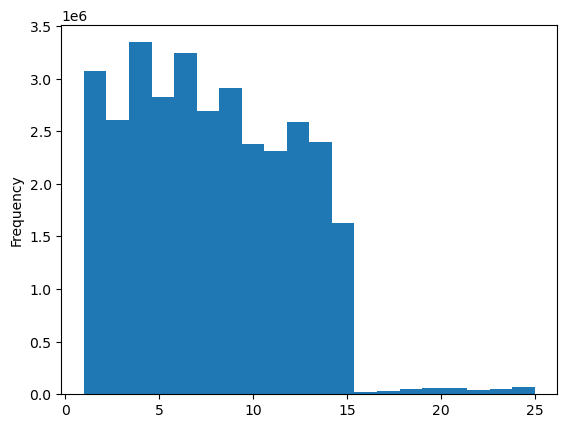

In [26]:
# Saving the visualization as an object.

hist = df_ords_prods_merge['prices'].plot.hist(bins = 20)

- Most products are between 1-15 dollars.
- Few products are priced over 15 dollars.
- Even fewer products are priced over 25 dollars.

# Exporting Data

In [27]:
# Exporting updated/cleaned data as a pickle.

df_ords_prods_merge.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'updated_grouped_agg_orders_products_merged.pkl'))